In [230]:
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Get data from John Hopkins CSSE Git Repository
# Rerun this daily to get updated statistics

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
confirmed = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
death = pd.read_csv(url, error_bad_lines=False)
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
recover = pd.read_csv(url, error_bad_lines=False)

# Frequently updated local data source 
url = 'https://raw.githubusercontent.com/digitalhumanitarians/COVID-19LK/master/time_series-covid-19-Confirmed.csv'
lk_confirmed = pd.read_csv(url, error_bad_lines=False)

In [231]:
# check for last availble date => Maryland is 9:30 hrs behind local time
last_date=confirmed.columns[confirmed.columns.size-1]
print(last_date)

3/16/20


In [232]:
# sum over countries
confirmedcountry=confirmed.groupby("Country/Region", as_index=False).sum() 

In [233]:
# order by cases
# get top 10 countries => using first column as index
ccs=confirmedcountry.sort_values(by=last_date, ascending=False).head(10)
print('Confirmed Cases') 

print(ccs[['Country/Region',last_date]].to_string(index=False))

Confirmed Cases
 Country/Region  3/16/20
          China    81033
          Italy    27980
           Iran    14991
          Spain     9942
   Korea, South     8236
        Germany     7272
         France     6650
             US     4632
    Switzerland     2200
 United Kingdom     1551


In [234]:
ccs.head(10)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20
28,China,1083.3367,3684.4197,548,643,920,1406,2075,2877,5509,...,80770,80823,80860,80887,80921,80932,80945,80977,81003,81033
72,Italy,43.0000,12.0000,0,0,0,0,0,0,0,...,5883,7375,9172,10149,12462,12462,17660,21157,24747,27980
68,Iran,32.0000,53.0000,0,0,0,0,0,0,0,...,5823,6566,7161,8042,9000,10075,11364,12729,13938,14991
133,Spain,40.0000,-4.0000,0,0,0,0,0,0,0,...,500,673,1073,1695,2277,2277,5232,6391,7798,9942
79,"Korea, South",36.0000,128.0000,1,1,2,2,3,4,4,...,7041,7314,7478,7513,7755,7869,7979,8086,8162,8236
52,Germany,51.0000,9.0000,0,0,0,0,0,1,4,...,799,1040,1176,1457,1908,2078,3675,4585,5795,7272
48,France,71.8751,-43.8058,0,0,2,3,3,3,4,...,957,1134,1217,1792,2289,2289,3672,4480,4513,6650
147,US,9531.0034,-22951.8209,1,1,2,2,5,5,5,...,402,518,583,959,1281,1663,2179,2727,3499,4632
138,Switzerland,46.8182,8.2275,0,0,0,0,0,0,0,...,268,337,374,491,652,652,1139,1359,2200,2200
150,United Kingdom,160.2045,-92.4086,0,0,0,0,0,0,0,...,207,274,322,384,459,459,802,1144,1145,1551


In [235]:
# sum of the deaths over countries
deathcountry=death.groupby("Country/Region", as_index=False).sum()

In [236]:
# sum of the recoveries over countries
recovercountry=recover.groupby("Country/Region", as_index=False).sum()

In [237]:
# order by cases 
# get top 10 countries => using first column as index
dcs=deathcountry.sort_values(by=last_date, ascending=False).head(10)
print('Deaths')

print(dcs[['Country/Region',last_date]].to_string(index=False)) 

Deaths
 Country/Region  3/16/20
          China     3217
          Italy     2158
           Iran      853
          Spain      342
         France      148
             US       85
   Korea, South       75
 United Kingdom       56
          Japan       27
    Netherlands       24


In [238]:
# order by recoveries 
# get top 10 countries => using first column as index
rcs=recoversum.sort_values(by=last_date, ascending=False).head(10)
print("Deaths")

print(rcs[["Country/Region", last_date]].to_string(index=False))

Deaths
Country/Region  3/16/20
         China    67910
          Iran     4590
         Italy     2749
  Korea, South     1137
         Spain      530
   Cruise Ship      325
         Japan      144
     Singapore      109
       Bahrain       77
       Germany       67


In [239]:
# top 10 countries by cases
countries=ccs['Country/Region'].values
print(countries)

['China' 'Italy' 'Iran' 'Spain' 'Korea, South' 'Germany' 'France' 'US'
 'Switzerland' 'United Kingdom']


In [240]:
# top 10 countries by deaths
dcountries=dcs['Country/Region'].values
print(dcountries)

['China' 'Italy' 'Iran' 'Spain' 'France' 'US' 'Korea, South'
 'United Kingdom' 'Japan' 'Netherlands']


In [241]:
# top 10 countries by recoveries
rcountries=rcs["Country/Region"].values
print(rcountries)

['China' 'Iran' 'Italy' 'Korea, South' 'Spain' 'Cruise Ship' 'Japan'
 'Singapore' 'Bahrain' 'Germany']


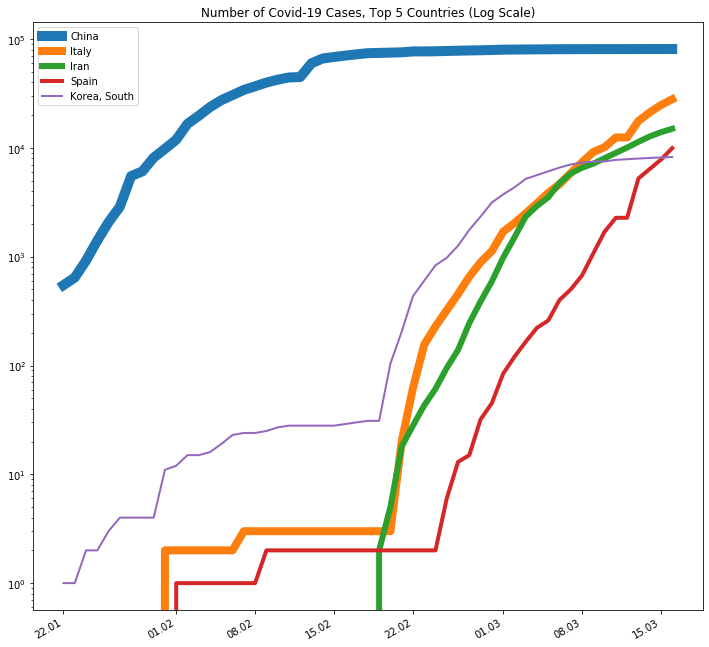

In [242]:
# top 5 countries by number of confirmed cases => Log scale
zerodate = datetime.datetime(2020, 1, 22) # => change this if when running local data
d = confirmed.columns.size-4
date0 = [zerodate + datetime.timedelta(days=i) for i in range(d)]

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in countries[0:5]:
    scdata=ccs.loc[ccs['Country/Region']==country].values[:,3:][0]
    ax.set_yscale('log')
    ax.plot(date0,scdata, label='%s' % country, linewidth=12-2*i)
    myFmt = DateFormatter("%d.%m")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.set_title('Number of Covid-19 Cases, Top 5 Countries (Log Scale)')
    i=i+1
plt.show()

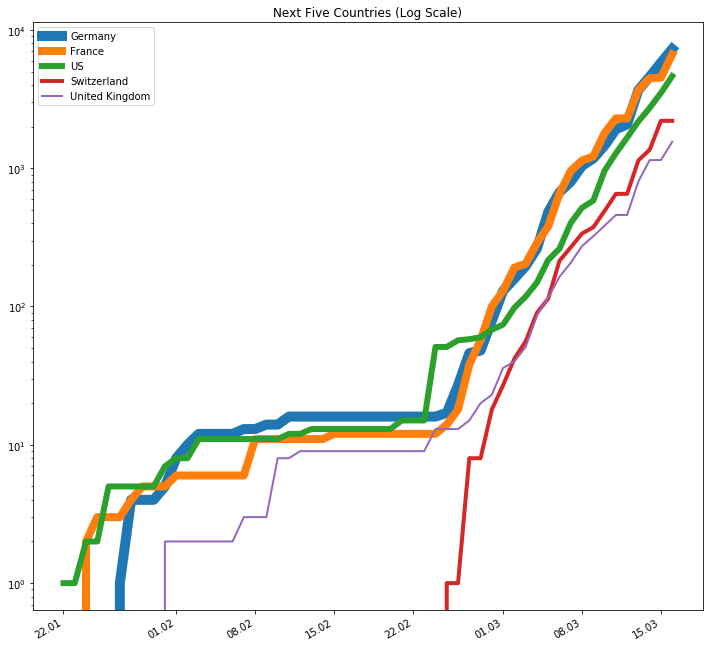

In [243]:
# next 5 countries by number of confirmed cases (5-10) => Log scale

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in countries[5:10]:
    scdata=ccs.loc[ccs['Country/Region']==country].values[:,3:][0]
    ax.set_yscale('log')
    ax.plot(date0,scdata, label='%s' % country, linewidth=12-2*i)
    myFmt = DateFormatter("%d.%m")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.set_title('Next Five Countries (Log Scale)')
    i=i+1
plt.show()

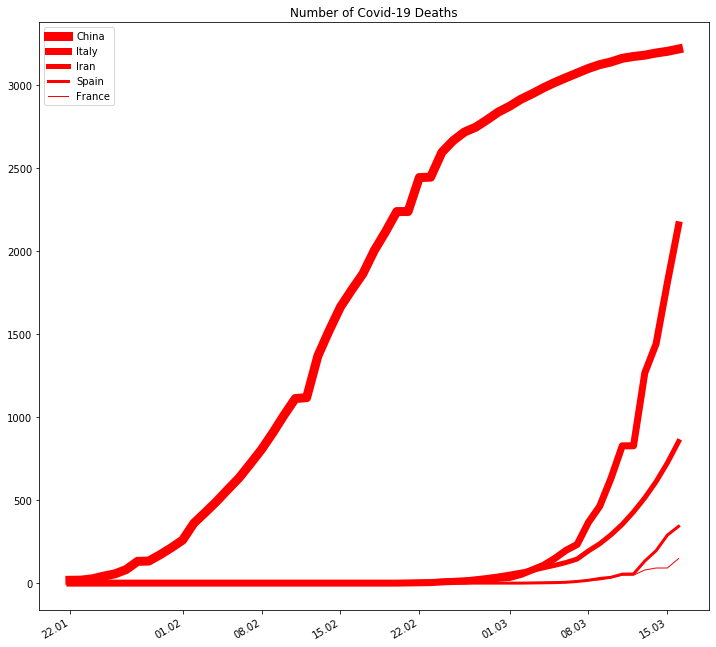

In [244]:
# top 5 countries by number of deaths => Log scale

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in dcountries[0:5]:
    scdata=dcs.loc[dcs['Country/Region']==country].values[:,3:][0]
    ax.plot(date0,scdata, label='%s' % country, linewidth=11-2*i, color='red')
    myFmt = DateFormatter("%d.%m")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.set_title('Number of Covid-19 Deaths')
    i=i+1
plt.show()

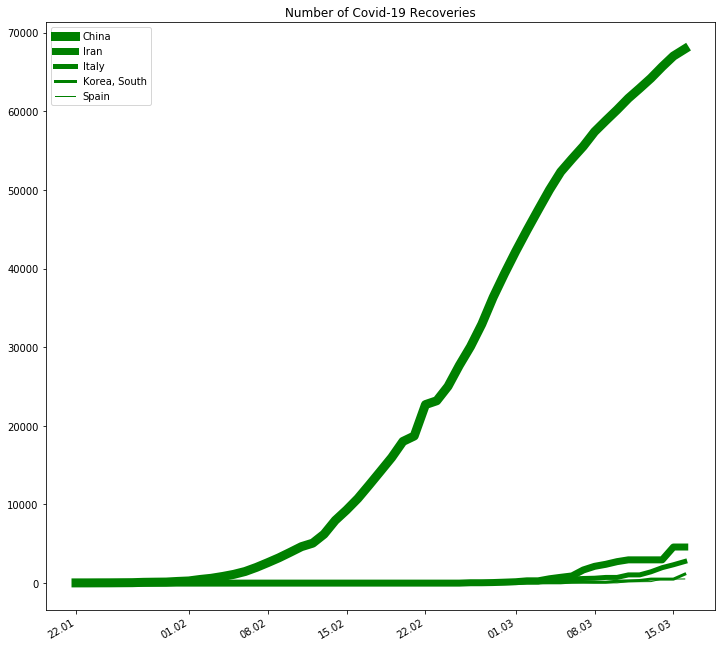

In [245]:
# top 5 countries by number of recoveries => Log scale

fig, ax = plt.subplots(figsize=(12, 12)) 
i=1
for country in rcountries[0:5]:
    scdata=rcs.loc[rcs['Country/Region']==country].values[:,3:][0]
    ax.plot(date0,scdata, label='%s' % country, linewidth=11-2*i, color='green')
    myFmt = DateFormatter("%d.%m")
    ax.xaxis.set_major_formatter(myFmt)
    fig.autofmt_xdate()
    ax.legend(loc='upper left')
    ax.set_title('Number of Covid-19 Recoveries')
    i=i+1
plt.show()

In [246]:
# cases in Sri Lanka
sldata=confirmed.loc[confirmed['Country/Region']=='Sri Lanka'].values[:,4:][0]
print(sldata)

# updated cases from local source
# sldata = lk_confirmed.loc[lk_confirmed['Location']=='IDH'].values[:,1:][0]
# print(sldata)

[0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 2 6 10 18 28]


In [247]:
# regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

LR = LinearRegression()
d = np.arange(sldata.size).reshape(-1,1)

# degree => 7 was the best fit
quad = PolynomialFeatures(degree=7)
X_quad = quad.fit_transform(d)

LR.fit(X_quad, sldata)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [248]:
# next 14 days forecast
from sklearn.metrics import r2_score

d_fit = np.arange(0, sldata.size+14)[:, np.newaxis]
y_poly_fit = LR.predict(quad.fit_transform(d_fit))
quad_r2 = r2_score(sldata, LR.predict(X_quad))

# coefficiants of the regression polynomial
print(LR.coef_)

# R^2 score
print("\nR^2 =", quad_r2)

[ 0.00000000e+00  1.13269864e+00 -3.02758063e-01  3.61577410e-02
 -2.14474051e-03  6.60256439e-05 -1.00975518e-06  6.05930395e-09]

R^2 = 0.9868323703570384


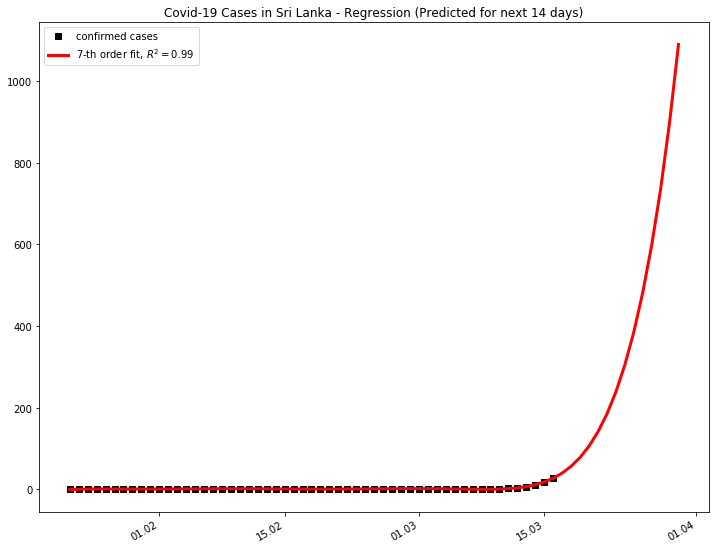

In [250]:
# plot regression for next 14 days

date = [zerodate + datetime.timedelta(days=i) for i in range(len(d_fit))]
fig, ax = plt.subplots(figsize=(12, 10)) 
ax.plot(date0,sldata,'s',color='black',label='confirmed cases')
ax.plot(date, y_poly_fit,label='$7$-th order fit, $R^2=%.2f$' % quad_r2, linestyle='-', color='red', linewidth=3)
ax.legend(loc='upper left')
ax.set_title('Covid-19 Cases in Sri Lanka - Regression (Predicted for next 14 days)')
myFmt = DateFormatter("%d.%m")
ax.xaxis.set_major_formatter(myFmt)
fig.autofmt_xdate()
plt.show()